In [1]:
import pandas as pd
import model
import argparse
from tensorflow.keras.callbacks import History, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
file_path = "training_set.csv"
df = pd.read_csv(file_path)
data = df.values


In [3]:
df.head()

,day,order_in_month,month,hour,minute,load
0,0,2.0,0,0.0,0.0,81.24
1,0,3.0,0,0.0,0.0,81.24
2,0,0.0,0,0.0,0.0,66.32
3,0,0.0,0,0.0,0.0,88.86
4,0,3.0,0,0.0,15.0,80.99


In [5]:
Y = df["load"].values.reshape(-1,1) # training label
X = df[df.columns[:-1]].values.reshape(-1,5)  # training data

In [6]:
Y

array([[81.24],
       [81.24],
       [66.32],
       ...,
       [80.32],
       [92.37],
       [80.99]])

In [7]:
X

array([[ 0.,  2.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ...,
       [ 6.,  3., 11., 23., 45.],
       [ 6.,  0., 11., 23., 45.],
       [ 6.,  2., 11., 23., 45.]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, shuffle=True)

In [82]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [83]:
model = Sequential()

model.add(Dense(300,
                activation='relu',
                input_shape = X_train.shape[1:]))

model.add(Dense(90,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,
                activation='linear'))



In [123]:
epochs = 2300
checkpoint_file = "checkpoint/c.hdf5"
model_file = "model/m.h5"

In [124]:
optimizer = Adam(0.0005)
model.compile(optimizer=optimizer,
              loss='mse')

In [125]:
model_checkpoint = ModelCheckpoint(filepath=checkpoint_file,save_best_only=True)

In [126]:
hist = model.fit(X_train, y_train,validation_split=0.15,
            callbacks=[model_checkpoint],
          batch_size=64, epochs=epochs,shuffle=True)
model.save(model_file)

Train on 17948 samples, validate on 3168 samples
Epoch 1/2300
17948/17948 [==============================] - 1s 54us/sample - loss: 92.8360 - val_loss: 99.2341
Epoch 2/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 92.2037 - val_loss: 98.6081
Epoch 3/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 92.1034 - val_loss: 95.1986
Epoch 4/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 92.1123 - val_loss: 95.1572
Epoch 5/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 92.2280 - val_loss: 95.3227
Epoch 6/2300
17948/17948 [==============================] - 1s 39us/sample - loss: 91.7662 - val_loss: 95.5969
Epoch 7/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 92.2918 - val_loss: 93.8660
Epoch 8/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 92.2157 - val_loss: 94.2598
Epoch 9/2300
17948/17948 [==============================] - 1s 

Epoch 74/2300
17948/17948 [==============================] - 1s 41us/sample - loss: 91.4759 - val_loss: 94.4347
Epoch 75/2300
17948/17948 [==============================] - 1s 44us/sample - loss: 91.7595 - val_loss: 95.6809
Epoch 76/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 91.5518 - val_loss: 96.9502
Epoch 77/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 91.7909 - val_loss: 97.2195
Epoch 78/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 91.5134 - val_loss: 95.5530
Epoch 79/2300
17948/17948 [==============================] - 1s 45us/sample - loss: 91.1141 - val_loss: 96.0682
Epoch 80/2300
17948/17948 [==============================] - 1s 41us/sample - loss: 92.0900 - val_loss: 98.0023
Epoch 81/2300
17948/17948 [==============================] - 1s 37us/sample - loss: 91.0058 - val_loss: 97.5001
Epoch 82/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 91.5674 - val_loss: 

17948/17948 [==============================] - 1s 35us/sample - loss: 90.7364 - val_loss: 96.1373
Epoch 147/2300
17948/17948 [==============================] - 1s 44us/sample - loss: 90.9274 - val_loss: 101.9269
Epoch 148/2300
17948/17948 [==============================] - 1s 40us/sample - loss: 91.4677 - val_loss: 95.9990
Epoch 149/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 90.8367 - val_loss: 95.9995
Epoch 150/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 90.9181 - val_loss: 97.0408
Epoch 151/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 91.0693 - val_loss: 97.1025
Epoch 152/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 91.0297 - val_loss: 96.4842
Epoch 153/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 90.6975 - val_loss: 97.2928
Epoch 154/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 91.3364 - val_loss: 95.92

17948/17948 [==============================] - 1s 34us/sample - loss: 90.2586 - val_loss: 98.8444
Epoch 219/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 90.9049 - val_loss: 97.0043
Epoch 220/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 90.3666 - val_loss: 96.0184
Epoch 221/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 90.6642 - val_loss: 98.5320
Epoch 222/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 90.9907 - val_loss: 97.1844
Epoch 223/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 90.5572 - val_loss: 97.7326
Epoch 224/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 90.6955 - val_loss: 96.4923
Epoch 225/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 90.1864 - val_loss: 98.0163
Epoch 226/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 91.0475 - val_loss: 95.514

17948/17948 [==============================] - 1s 33us/sample - loss: 89.8875 - val_loss: 98.1239
Epoch 291/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 89.6508 - val_loss: 97.2261
Epoch 292/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 90.2008 - val_loss: 97.4855
Epoch 293/2300
17948/17948 [==============================] - 1s 37us/sample - loss: 89.8794 - val_loss: 97.3977
Epoch 294/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 90.1704 - val_loss: 98.9232
Epoch 295/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 90.4000 - val_loss: 97.5807
Epoch 296/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 89.9920 - val_loss: 97.0240
Epoch 297/2300
17948/17948 [==============================] - 1s 37us/sample - loss: 89.9300 - val_loss: 99.0544
Epoch 298/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 90.0400 - val_loss: 96.474

17948/17948 [==============================] - 1s 32us/sample - loss: 89.8714 - val_loss: 99.9484
Epoch 363/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.6339 - val_loss: 97.1221
Epoch 364/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.6397 - val_loss: 99.9555
Epoch 365/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.6877 - val_loss: 97.2546
Epoch 366/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.8537 - val_loss: 97.6857
Epoch 367/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.9983 - val_loss: 98.6952
Epoch 368/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.5467 - val_loss: 97.4683
Epoch 369/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.9043 - val_loss: 96.4432
Epoch 370/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.4476 - val_loss: 98.050

17948/17948 [==============================] - 1s 33us/sample - loss: 89.7963 - val_loss: 100.0571
Epoch 435/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.2383 - val_loss: 100.2760
Epoch 436/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 89.1178 - val_loss: 98.7627
Epoch 437/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 89.3000 - val_loss: 98.5974
Epoch 438/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.9077 - val_loss: 103.1223
Epoch 439/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.7513 - val_loss: 98.0587
Epoch 440/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 89.2929 - val_loss: 99.9698
Epoch 441/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.6921 - val_loss: 99.1327
Epoch 442/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 90.3468 - val_loss: 98.

17948/17948 [==============================] - 1s 32us/sample - loss: 88.9204 - val_loss: 100.4771
Epoch 507/2300
17948/17948 [==============================] - 1s 37us/sample - loss: 88.9044 - val_loss: 101.0277
Epoch 508/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.6194 - val_loss: 99.3190
Epoch 509/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 89.0927 - val_loss: 98.5898
Epoch 510/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.2993 - val_loss: 97.8628
Epoch 511/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.3424 - val_loss: 98.4593
Epoch 512/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 89.0696 - val_loss: 99.4484
Epoch 513/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 89.1153 - val_loss: 99.8090
Epoch 514/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 89.4528 - val_loss: 101.

17948/17948 [==============================] - 1s 31us/sample - loss: 89.4778 - val_loss: 100.2291
Epoch 579/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.4015 - val_loss: 101.0481
Epoch 580/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.7957 - val_loss: 99.7387
Epoch 581/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 88.3772 - val_loss: 99.1476
Epoch 582/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 88.6915 - val_loss: 98.9879
Epoch 583/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.8692 - val_loss: 99.3167
Epoch 584/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.9789 - val_loss: 99.4882
Epoch 585/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.3536 - val_loss: 101.8542
Epoch 586/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.6455 - val_loss: 104

17948/17948 [==============================] - 1s 31us/sample - loss: 88.3700 - val_loss: 99.2709
Epoch 651/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.7838 - val_loss: 101.4064
Epoch 652/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.0619 - val_loss: 99.3697
Epoch 653/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 88.6231 - val_loss: 99.6025
Epoch 654/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.4704 - val_loss: 99.2810
Epoch 655/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.1851 - val_loss: 99.9805
Epoch 656/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.3739 - val_loss: 99.9632
Epoch 657/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.3519 - val_loss: 101.2058
Epoch 658/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.8800 - val_loss: 103.

17948/17948 [==============================] - 1s 32us/sample - loss: 87.9834 - val_loss: 103.9414
Epoch 723/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 88.0348 - val_loss: 106.3534
Epoch 724/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.1570 - val_loss: 101.4682
Epoch 725/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.6220 - val_loss: 101.1808
Epoch 726/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.2700 - val_loss: 101.5389
Epoch 727/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.9445 - val_loss: 102.4602
Epoch 728/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.9831 - val_loss: 100.3217
Epoch 729/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 88.9947 - val_loss: 103.7258
Epoch 730/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 88.0589 - val_loss

17948/17948 [==============================] - 1s 34us/sample - loss: 87.8616 - val_loss: 101.9086
Epoch 795/2300
17948/17948 [==============================] - 1s 39us/sample - loss: 88.2067 - val_loss: 101.0846
Epoch 796/2300
17948/17948 [==============================] - 1s 39us/sample - loss: 87.5480 - val_loss: 100.2436
Epoch 797/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 87.7152 - val_loss: 100.3047
Epoch 798/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 87.9072 - val_loss: 101.0687
Epoch 799/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.7449 - val_loss: 102.2411
Epoch 800/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.7409 - val_loss: 103.5209
Epoch 801/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.9272 - val_loss: 100.2460
Epoch 802/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 88.4690 - val_loss

17948/17948 [==============================] - 1s 31us/sample - loss: 87.3956 - val_loss: 101.6406
Epoch 867/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.7368 - val_loss: 101.7733
Epoch 868/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.5889 - val_loss: 102.4009
Epoch 869/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.7466 - val_loss: 105.7912
Epoch 870/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 88.0426 - val_loss: 107.1035
Epoch 871/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.6297 - val_loss: 102.9738
Epoch 872/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.7239 - val_loss: 102.6723
Epoch 873/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.4712 - val_loss: 102.0839
Epoch 874/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 87.4652 - val_loss

Epoch 938/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 87.1464 - val_loss: 101.7166
Epoch 939/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 87.2529 - val_loss: 101.7065
Epoch 940/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.6131 - val_loss: 102.8916
Epoch 941/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.4579 - val_loss: 106.2962
Epoch 942/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 87.3350 - val_loss: 102.5426
Epoch 943/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 87.6120 - val_loss: 101.6334
Epoch 944/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.3521 - val_loss: 101.9647
Epoch 945/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.4528 - val_loss: 102.3174
Epoch 946/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.

Epoch 1010/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 87.2603 - val_loss: 103.4808
Epoch 1011/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.5892 - val_loss: 102.7314
Epoch 1012/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.3507 - val_loss: 103.7047
Epoch 1013/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.0741 - val_loss: 103.3212
Epoch 1014/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.2198 - val_loss: 105.1645
Epoch 1015/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.1126 - val_loss: 103.2503
Epoch 1016/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 87.5006 - val_loss: 103.1610
Epoch 1017/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.3863 - val_loss: 102.3005
Epoch 1018/2300
17948/17948 [==============================] - 1s 32us/sample - 

17948/17948 [==============================] - 1s 56us/sample - loss: 86.9346 - val_loss: 103.2631
Epoch 1082/2300
17948/17948 [==============================] - 1s 50us/sample - loss: 86.6761 - val_loss: 102.7027
Epoch 1083/2300
17948/17948 [==============================] - 1s 51us/sample - loss: 86.8853 - val_loss: 103.6491
Epoch 1084/2300
17948/17948 [==============================] - 1s 46us/sample - loss: 87.1252 - val_loss: 103.7998
Epoch 1085/2300
17948/17948 [==============================] - 1s 45us/sample - loss: 86.9183 - val_loss: 104.4056
Epoch 1086/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.9939 - val_loss: 106.3497
Epoch 1087/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.1010 - val_loss: 104.1370
Epoch 1088/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.0976 - val_loss: 102.8932
Epoch 1089/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.0152 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 87.1256 - val_loss: 104.0682
Epoch 1153/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.7581 - val_loss: 102.7279
Epoch 1154/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.7070 - val_loss: 103.5992
Epoch 1155/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.1146 - val_loss: 103.8797
Epoch 1156/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.8564 - val_loss: 104.5759
Epoch 1157/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 87.1227 - val_loss: 110.3161
Epoch 1158/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.5495 - val_loss: 103.3616
Epoch 1159/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.7861 - val_loss: 103.3737
Epoch 1160/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.9404 - 

17948/17948 [==============================] - 1s 32us/sample - loss: 86.5257 - val_loss: 103.5059
Epoch 1224/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.5461 - val_loss: 105.2322
Epoch 1225/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.0895 - val_loss: 106.0318
Epoch 1226/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.9177 - val_loss: 103.7576
Epoch 1227/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.7815 - val_loss: 104.1261
Epoch 1228/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.6258 - val_loss: 105.8587
Epoch 1229/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.3717 - val_loss: 103.4283
Epoch 1230/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.4187 - val_loss: 104.4394
Epoch 1231/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.3969 - 

17948/17948 [==============================] - 1s 31us/sample - loss: 86.6592 - val_loss: 107.0857
Epoch 1295/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 86.7769 - val_loss: 104.9780
Epoch 1296/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.3085 - val_loss: 104.5848
Epoch 1297/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.0473 - val_loss: 103.8004
Epoch 1298/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.5103 - val_loss: 104.5760
Epoch 1299/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.4034 - val_loss: 106.9333
Epoch 1300/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.7116 - val_loss: 107.1009
Epoch 1301/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.3300 - val_loss: 106.7332
Epoch 1302/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.7980 - 

17948/17948 [==============================] - 1s 31us/sample - loss: 86.3503 - val_loss: 105.7800
Epoch 1366/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.8430 - val_loss: 104.6371
Epoch 1367/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.1528 - val_loss: 105.1701
Epoch 1368/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.5791 - val_loss: 106.4717
Epoch 1369/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 85.8435 - val_loss: 105.5917
Epoch 1370/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 85.9112 - val_loss: 106.0006
Epoch 1371/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.3493 - val_loss: 104.5498
Epoch 1372/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.2404 - val_loss: 106.2174
Epoch 1373/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.0347 - 

17948/17948 [==============================] - 1s 32us/sample - loss: 85.9715 - val_loss: 106.8520
Epoch 1437/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 85.8648 - val_loss: 105.9303
Epoch 1438/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 86.3068 - val_loss: 105.8312
Epoch 1439/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 86.3935 - val_loss: 105.5262
Epoch 1440/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 85.5829 - val_loss: 108.1087
Epoch 1441/2300
17948/17948 [==============================] - 1s 43us/sample - loss: 86.2759 - val_loss: 107.0875
Epoch 1442/2300
17948/17948 [==============================] - 1s 39us/sample - loss: 86.2751 - val_loss: 107.8909
Epoch 1443/2300
17948/17948 [==============================] - 1s 41us/sample - loss: 86.0140 - val_loss: 105.7283
Epoch 1444/2300
17948/17948 [==============================] - 1s 31us/sample - loss: 86.3542 - 

17948/17948 [==============================] - 1s 37us/sample - loss: 86.3128 - val_loss: 105.8224
Epoch 1508/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 86.3083 - val_loss: 110.2693
Epoch 1509/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 85.8076 - val_loss: 106.5206
Epoch 1510/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 85.6113 - val_loss: 107.2343
Epoch 1511/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 86.0382 - val_loss: 107.2426
Epoch 1512/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 86.2419 - val_loss: 105.3045
Epoch 1513/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.9432 - val_loss: 108.5681
Epoch 1514/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.9287 - val_loss: 106.7855
Epoch 1515/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.6865 - 

17948/17948 [==============================] - 1s 34us/sample - loss: 86.4768 - val_loss: 107.0010
Epoch 1579/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.6844 - val_loss: 107.8656
Epoch 1580/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.4612 - val_loss: 107.6816
Epoch 1581/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.6158 - val_loss: 108.5646
Epoch 1582/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.7280 - val_loss: 107.1379
Epoch 1583/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.5940 - val_loss: 107.2420
Epoch 1584/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 86.1331 - val_loss: 107.1300
Epoch 1585/2300
17948/17948 [==============================] - 1s 37us/sample - loss: 85.7843 - val_loss: 107.1173
Epoch 1586/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 85.8052 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 85.9533 - val_loss: 108.1983
Epoch 1650/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.2105 - val_loss: 106.8929
Epoch 1651/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.7517 - val_loss: 107.8246
Epoch 1652/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 85.8221 - val_loss: 107.9476
Epoch 1653/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.6339 - val_loss: 107.2845
Epoch 1654/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.4867 - val_loss: 109.2571
Epoch 1655/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.5431 - val_loss: 110.6849
Epoch 1656/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.8965 - val_loss: 107.1696
Epoch 1657/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.5757 - 

17948/17948 [==============================] - 1s 38us/sample - loss: 85.2907 - val_loss: 108.1246
Epoch 1721/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.9727 - val_loss: 107.7003
Epoch 1722/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.8222 - val_loss: 108.5729
Epoch 1723/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.0483 - val_loss: 107.8672
Epoch 1724/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.5506 - val_loss: 108.1400
Epoch 1725/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.5352 - val_loss: 108.0564
Epoch 1726/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.5539 - val_loss: 107.4129
Epoch 1727/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.7007 - val_loss: 107.3946
Epoch 1728/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.8945 - 

17948/17948 [==============================] - 1s 34us/sample - loss: 85.5554 - val_loss: 109.1914
Epoch 1792/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.6733 - val_loss: 109.2636
Epoch 1793/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.9715 - val_loss: 108.7911
Epoch 1794/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.5282 - val_loss: 109.2458
Epoch 1795/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.8817 - val_loss: 107.1503
Epoch 1796/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.2858 - val_loss: 109.6119
Epoch 1797/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.7975 - val_loss: 110.6077
Epoch 1798/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.5070 - val_loss: 108.2882
Epoch 1799/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.5408 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 85.3295 - val_loss: 108.9686
Epoch 1863/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.9154 - val_loss: 109.6380
Epoch 1864/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.4703 - val_loss: 109.9105
Epoch 1865/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.2095 - val_loss: 109.0488
Epoch 1866/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 85.0478 - val_loss: 108.6679
Epoch 1867/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.4212 - val_loss: 109.2081
Epoch 1868/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.6916 - val_loss: 108.2878
Epoch 1869/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 85.1998 - val_loss: 108.2227
Epoch 1870/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.1362 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 85.5543 - val_loss: 110.2697
Epoch 1934/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.2806 - val_loss: 108.9479
Epoch 1935/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.1732 - val_loss: 109.0122
Epoch 1936/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.1583 - val_loss: 110.5411
Epoch 1937/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.1167 - val_loss: 109.0358
Epoch 1938/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 85.0149 - val_loss: 107.7067
Epoch 1939/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.8517 - val_loss: 108.6753
Epoch 1940/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.0138 - val_loss: 108.8392
Epoch 1941/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.9229 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 85.1195 - val_loss: 109.4021
Epoch 2005/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.8137 - val_loss: 110.3373
Epoch 2006/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 84.6613 - val_loss: 111.7730
Epoch 2007/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 85.0077 - val_loss: 111.1384
Epoch 2008/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 84.7609 - val_loss: 111.7330
Epoch 2009/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.0243 - val_loss: 110.4661
Epoch 2010/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.8438 - val_loss: 110.6045
Epoch 2011/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.8653 - val_loss: 109.3442
Epoch 2012/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.7086 - 

17948/17948 [==============================] - 1s 34us/sample - loss: 84.7310 - val_loss: 110.3745
Epoch 2076/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.8569 - val_loss: 109.6198
Epoch 2077/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.5995 - val_loss: 111.0491
Epoch 2078/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.7479 - val_loss: 110.7893
Epoch 2079/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.6933 - val_loss: 112.6906
Epoch 2080/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.6666 - val_loss: 109.6896
Epoch 2081/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.7641 - val_loss: 111.4580
Epoch 2082/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.7125 - val_loss: 110.5516
Epoch 2083/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 85.0004 - 

17948/17948 [==============================] - 1s 34us/sample - loss: 84.9708 - val_loss: 111.9216
Epoch 2147/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.7531 - val_loss: 111.2142
Epoch 2148/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.5868 - val_loss: 110.4344
Epoch 2149/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.5541 - val_loss: 112.2439
Epoch 2150/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.9585 - val_loss: 110.3006
Epoch 2151/2300
17948/17948 [==============================] - 1s 40us/sample - loss: 84.5505 - val_loss: 111.8930
Epoch 2152/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.7262 - val_loss: 112.2918
Epoch 2153/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 84.6994 - val_loss: 111.3036
Epoch 2154/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 84.3625 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 84.6935 - val_loss: 111.8958
Epoch 2218/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 84.1561 - val_loss: 111.0259
Epoch 2219/2300
17948/17948 [==============================] - 1s 32us/sample - loss: 84.6437 - val_loss: 112.1974
Epoch 2220/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.4201 - val_loss: 111.4425
Epoch 2221/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.4552 - val_loss: 111.1193
Epoch 2222/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.4769 - val_loss: 112.3619
Epoch 2223/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.5108 - val_loss: 112.2220
Epoch 2224/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 85.0113 - val_loss: 112.4747
Epoch 2225/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.5422 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 84.6545 - val_loss: 112.2067
Epoch 2289/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.2263 - val_loss: 112.2619
Epoch 2290/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 83.9065 - val_loss: 111.6527
Epoch 2291/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.2278 - val_loss: 112.8234
Epoch 2292/2300
17948/17948 [==============================] - 1s 36us/sample - loss: 84.1563 - val_loss: 111.4952
Epoch 2293/2300
17948/17948 [==============================] - 1s 38us/sample - loss: 84.5666 - val_loss: 111.9622
Epoch 2294/2300
17948/17948 [==============================] - 1s 33us/sample - loss: 84.3018 - val_loss: 112.5460
Epoch 2295/2300
17948/17948 [==============================] - 1s 34us/sample - loss: 84.2940 - val_loss: 112.2251
Epoch 2296/2300
17948/17948 [==============================] - 1s 35us/sample - loss: 84.4027 - 

# Loss and Validation Loss

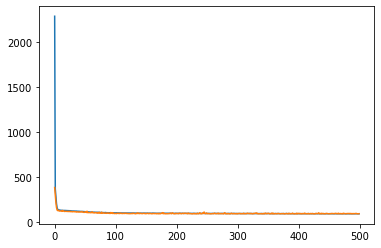

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [134]:
S = 0
N = 2900

In [136]:
predicted_value = model.predict(X_test[S:N])
predicted_value.shape

(2900, 1)

# 500 Epochs

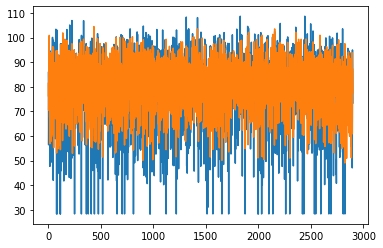

In [116]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 700 Epochs

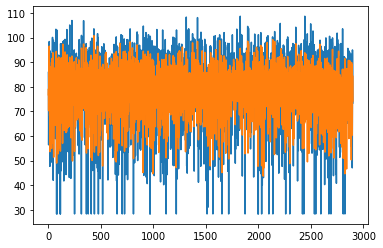

In [122]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 3000 Epochs 

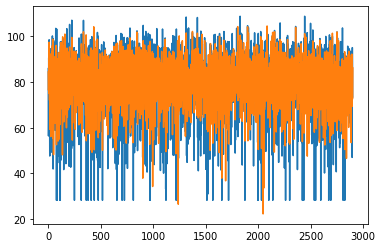

In [137]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()